In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f84ae2972e634d898873d53f95a86c03 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RXUzxp2-0wR_-YYUOqHyZ5seN5X1Jp983YfitsL3j-e5',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_f84ae2972e634d898873d53f95a86c03.get_object(Bucket='lifeexpectancy-donotdelete-pr-msgf8ps2z9m542',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
data = pd.read_csv(body)
data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data['Status'].head(5)

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [4]:
data.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
countries = data['Country'].unique()
for country in countries:
    data.loc[data['Country']==country,data.columns] = data.loc[data['Country']==country,data.columns].interpolate()
data.dropna(inplace = True)

In [7]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,50.932562,80.371917,5.902728,80.454454,2.274937,5392.335709,1.358390e+07,5.129995,5.199346,0.603453,11.639054
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,188.933117,24.363376,2.287467,24.450153,6.005112,11480.810350,6.490113e+07,4.750149,4.844382,0.206026,3.212964
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,1.000000,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,4.000000,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,36.000000,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.936000,20.700000


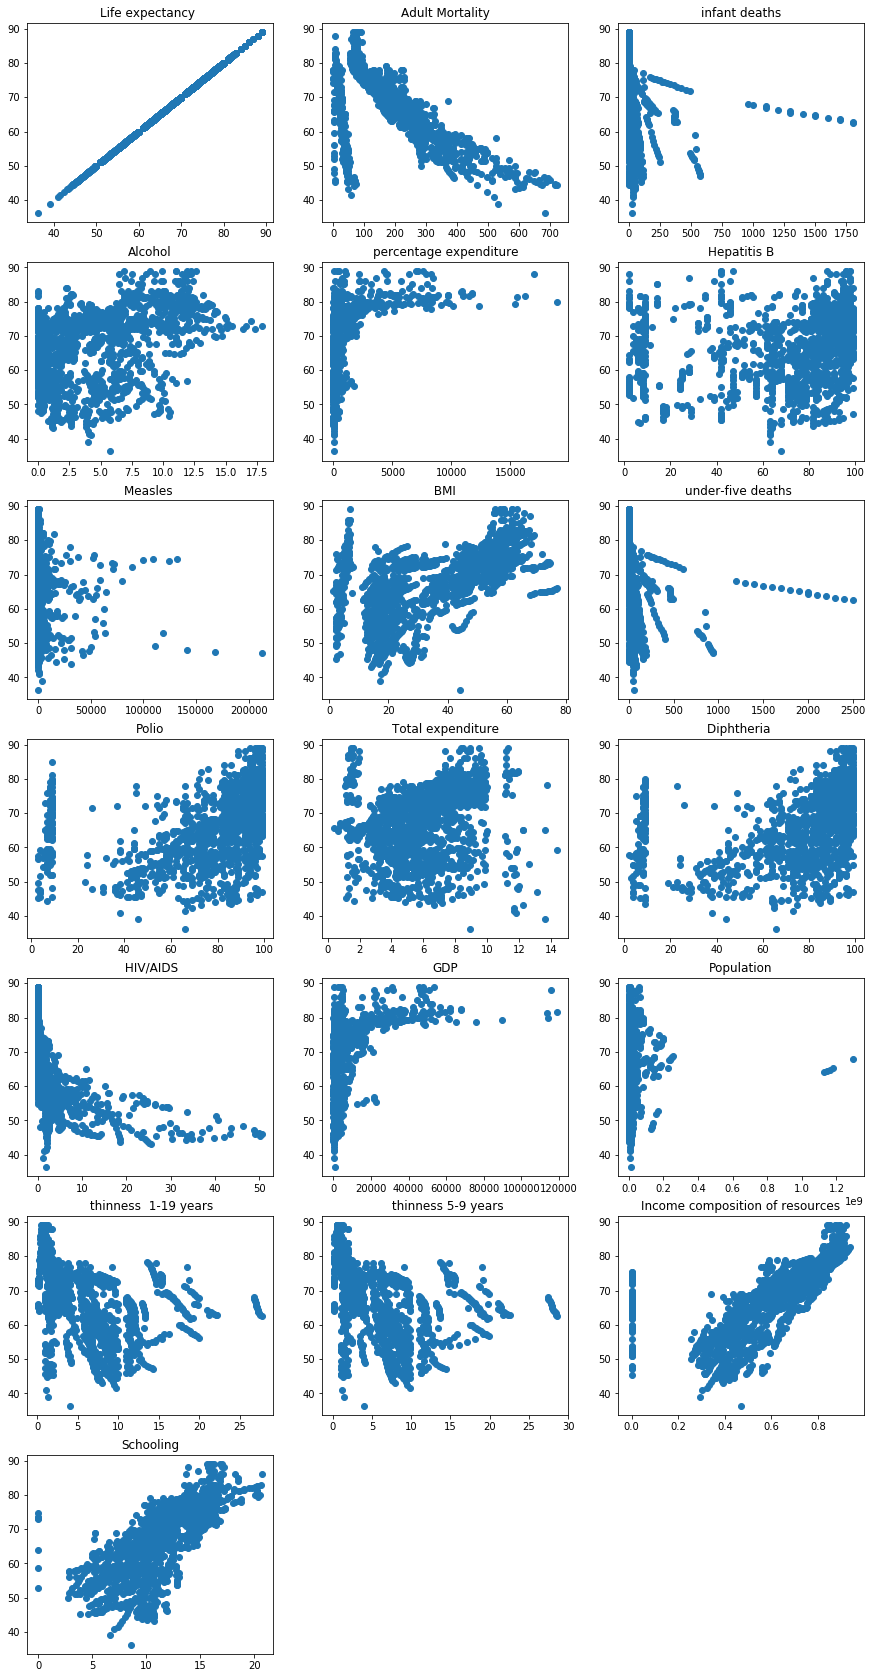

In [8]:
#looking for features which dont have a specific pattern , which can countribute any thing
plt.figure(figsize=(15,30))
for i in range(1,20):
    plt.subplot(7,3,i)
    plt.scatter(x=data[data.columns[i+2]],y=data['Life expectancy '])
    plt.title(data.columns[i+2])

In [9]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


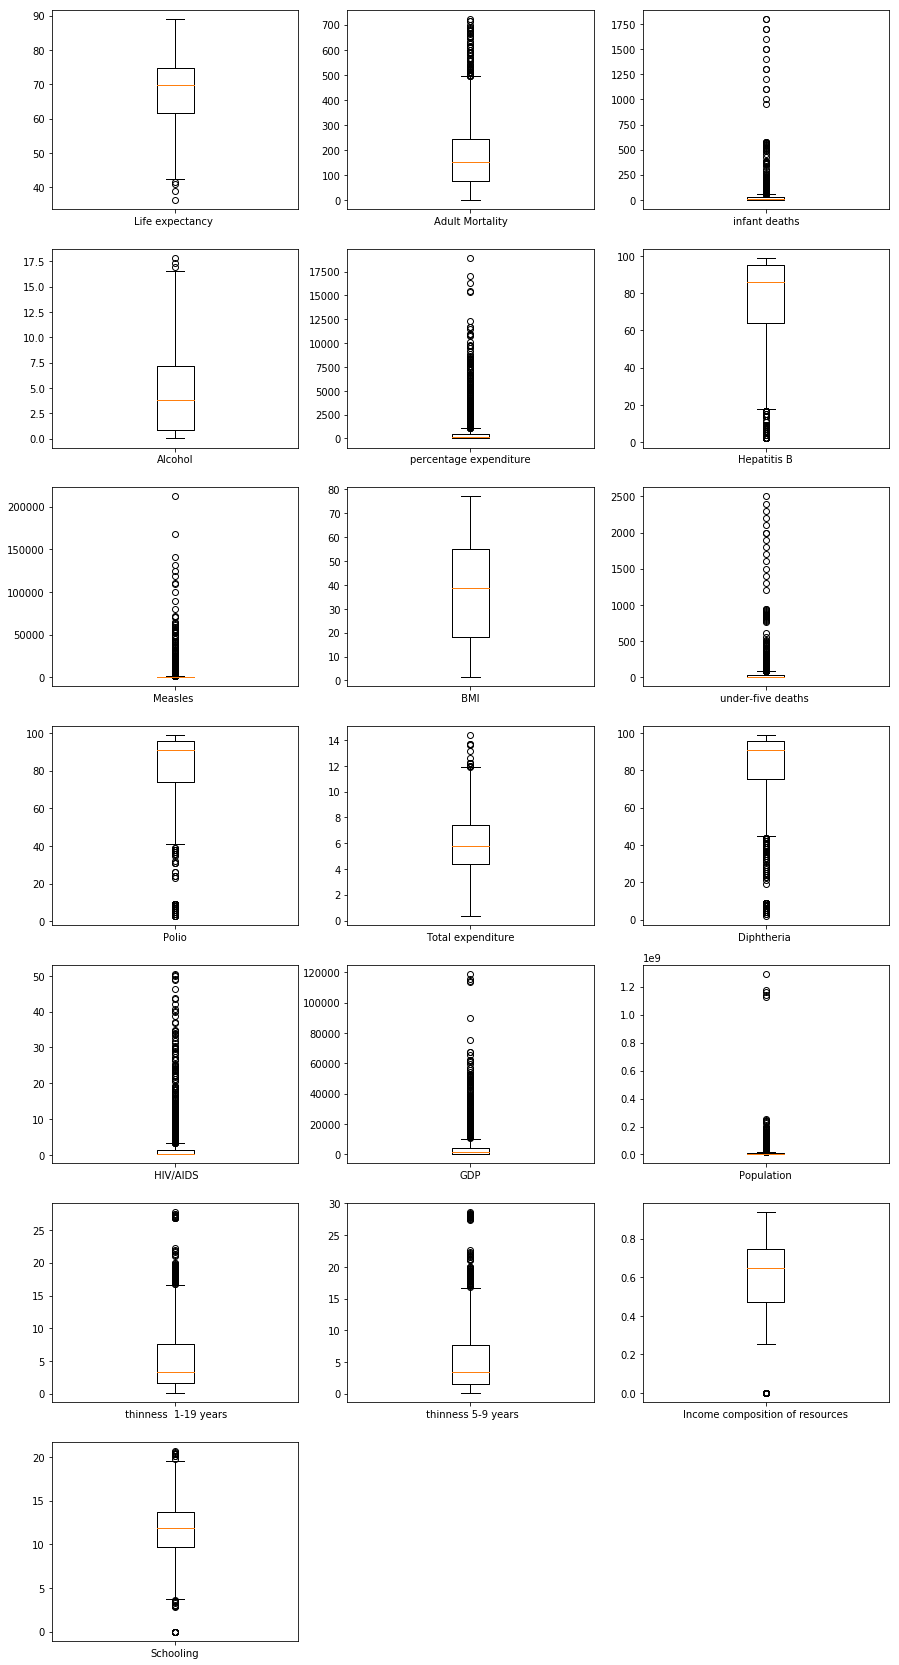

In [10]:
# let u look in outlier 
plt.figure(figsize=(15,30))
for i in range(1,20):
    plt.subplot(7,3,i)
    plt.boxplot([data[data.columns[i+2]]],labels = [data.columns[i+2]])

In [11]:
L = []
for i in data.columns[3:]:
    serial = data[i]
    q1 = np.percentile(serial,25)
    q3 = np.percentile(serial,75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    L.append([len(serial[(serial<floor)|(serial>ceiling)])])
    
pd.DataFrame(L,data.columns[3:],columns = ['Count'])

,Count
Life expectancy,4
Adult Mortality,58
infant deaths,198
Alcohol,3
percentage expenditure,232
Hepatitis B,216
Measles,361
BMI,0
under-five deaths,227
Polio,159


In [12]:
size = data.shape[0]
L=[]
for columns in data.columns[3:]:
    serial = data[columns]
    q1 = np.percentile(serial,25)
    q3 = np.percentile(serial,75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    l= len(serial[serial<floor])/size
    r= len(serial[serial>ceiling])/size
    L.append([l,r])
ratio  = pd.DataFrame(L,data.columns[3:],columns = ['Left ratio','Right ration'])
ratio

,Left ratio,Right ration
Life expectancy,0.002013,0.000000
Adult Mortality,0.000000,0.029190
infant deaths,0.000000,0.099648
Alcohol,0.000000,0.001510
percentage expenditure,0.000000,0.116759
Hepatitis B,0.108707,0.000000
Measles,0.000000,0.181681
BMI,0.000000,0.000000
under-five deaths,0.000000,0.114243
Polio,0.080020,0.000000


In [13]:
# clearning outliers using sklearn
new_data = pd.DataFrame(data[['Country','Year','Status']])
i = 0
left = list(ratio['Left ratio'])
right = list(ratio['Right ration'])
for col in data.columns[3:]:
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    new_data[col] = winsorize(data[col],(left[i],right[i]))
    i+=1
new_data.shape

(1987, 22)

In [14]:
L = []
for i in new_data.columns[3:]:
    serial = new_data[i]
    q1 = np.percentile(serial,25)
    q3 = np.percentile(serial,75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    L.append([len(serial[(serial<floor)|(serial>ceiling)])])
    
pd.DataFrame(L,new_data.columns[3:],columns = ['Count'])

,Count
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0
under-five deaths,0
Polio,0


In [15]:
new_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [16]:
new_columns={'Life expectancy ':'Life expectancy','Measles ':'Measles',' BMI ':'BMI','under-five deaths ':'under-five deaths','Diphtheria ':'Diphtheria',' thinness  1-19 years':'thinness  1-19 years',' thinness 5-9 years':'thinness 5-9 years',' HIV/AIDS':'HIV/AIDS'}
data.rename(columns = new_columns,inplace = True)
new_data.rename(columns = new_columns,inplace = True)

In [17]:
new_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

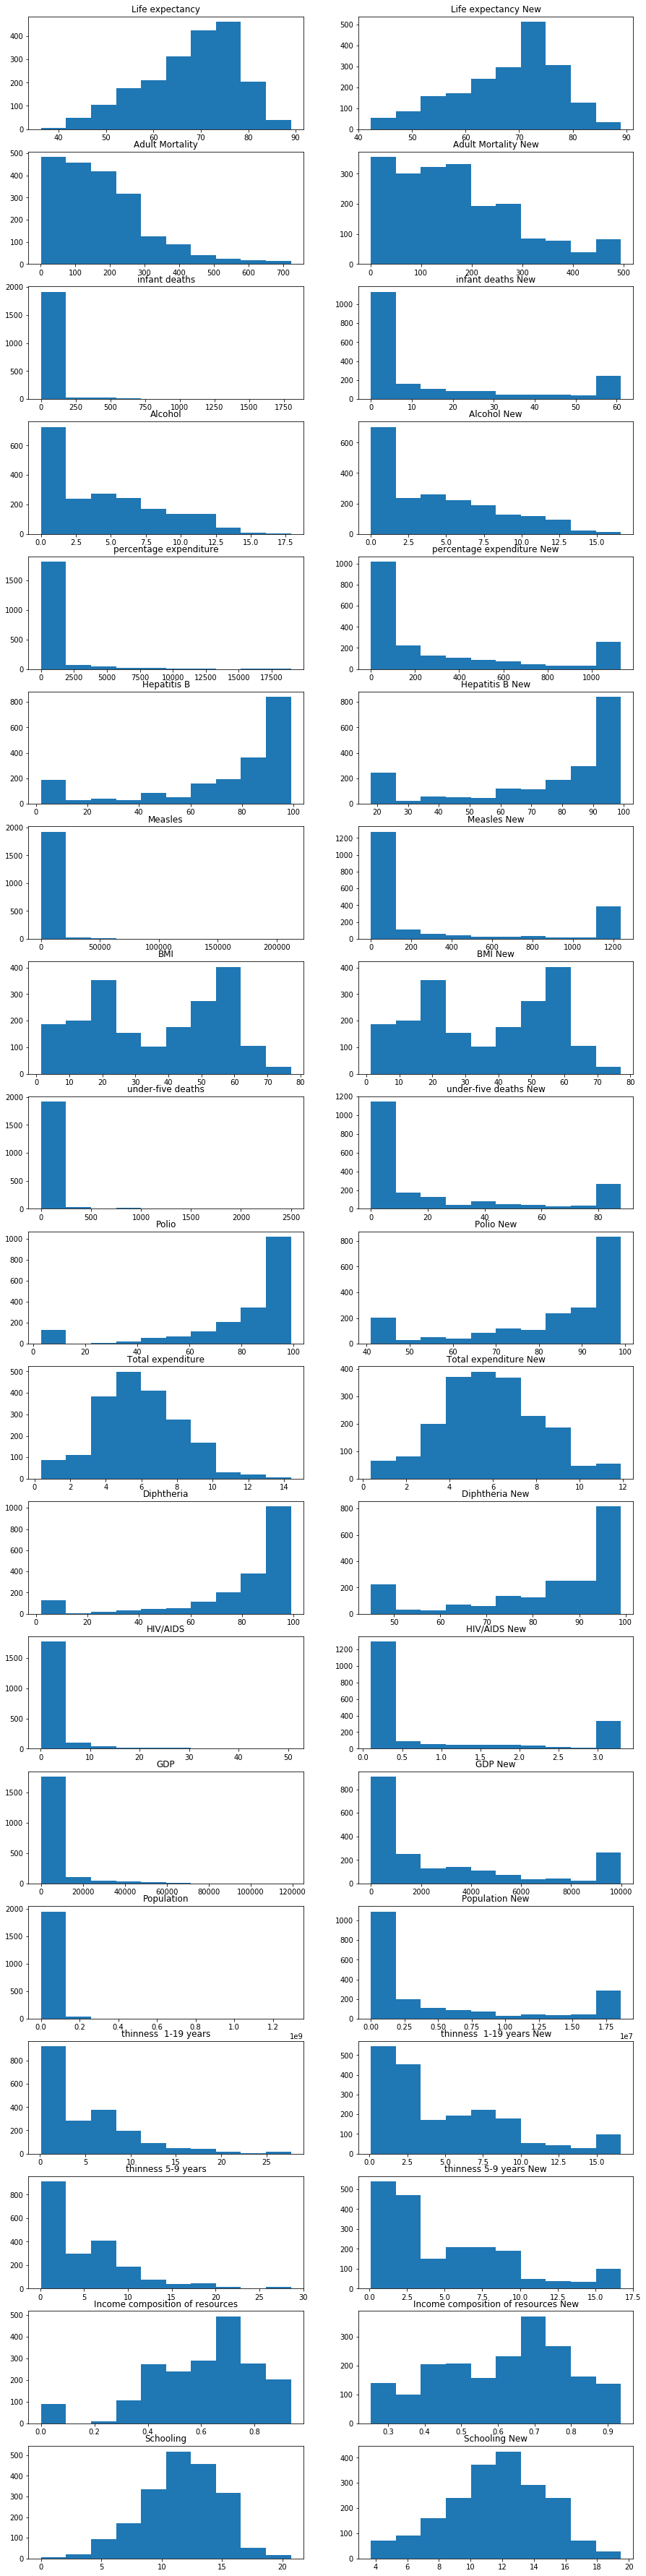

In [18]:
plt.figure(figsize =(15,75))
i=1
for col in new_data.columns[3:]:
    plt.subplot(data.shape[1],2,i)
    plt.hist(data[col])
    plt.title(col)
    plt.subplot(data.shape[1],2,i+1)
    plt.hist(new_data[col])
    plt.title(col+' New')
    i+=2  

In [19]:
new_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.987519,172.452944,15.502265,4.454421,308.847293,74.977353,320.350277,36.428636,22.090589,82.704580,5.897192,83.225969,0.889784,2952.366489,5.015481e+06,4.989633,5.039708,0.615040,11.652843
std,4.323147,9.689921,123.223620,20.877993,3.972851,384.415367,26.527285,485.995834,19.736138,30.744027,18.128383,2.270897,17.239348,1.214233,3366.103391,6.649021e+06,4.277716,4.307412,0.176789,3.146298
min,2000.000000,42.300000,1.000000,0.000000,0.010000,0.000000,18.000000,0.000000,1.400000,0.000000,41.000000,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.253000,3.700000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.000000,0.000000,18.150000,1.000000,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.000000,20.000000,38.700000,4.000000,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.000000,499.500000,55.000000,36.000000,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,495.000000,61.000000,16.580000,1132.432517,99.000000,1238.000000,77.100000,88.000000,99.000000,11.900000,99.000000,3.300000,9985.369590,1.858876e+07,16.600000,16.700000,0.936000,19.500000


In [20]:
new_data.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.171585,-0.060254,-0.045499,-0.047003,0.184421,0.256542,-0.133441,0.096059,-0.050770,0.141354,0.074025,0.181178,-0.096076,0.204492,0.034888,-0.048337,-0.051911,0.218295,0.221993
Life expectancy,0.171585,1.000000,-0.654901,-0.515853,0.393586,0.555929,0.267704,-0.309178,0.600445,-0.548183,0.507473,0.204633,0.535441,-0.791349,0.549374,-0.036186,-0.498801,-0.494097,0.815499,0.757358
Adult Mortality,-0.060254,-0.654901,1.000000,0.302843,-0.189274,-0.313498,-0.113034,0.158901,-0.384633,0.322271,-0.269296,-0.113167,-0.274523,0.570579,-0.307955,0.041105,0.323193,0.332948,-0.483251,-0.427434
infant deaths,-0.045499,-0.515853,0.302843,1.000000,-0.301029,-0.366958,-0.192581,0.584815,-0.475304,0.993697,-0.368139,-0.191875,-0.369402,0.361411,-0.353134,0.425737,0.415402,0.433636,-0.471397,-0.517723
Alcohol,-0.047003,0.393586,-0.189274,-0.301029,1.000000,0.534302,0.113947,-0.172164,0.379369,-0.302009,0.276991,0.230391,0.288963,-0.137865,0.541885,0.001856,-0.415416,-0.404785,0.585143,0.596348
percentage expenditure,0.184421,0.555929,-0.313498,-0.366958,0.534302,1.000000,0.095724,-0.226976,0.420111,-0.373319,0.281754,0.286910,0.293506,-0.307407,0.916887,-0.026602,-0.389512,-0.389713,0.625121,0.610287
Hepatitis B,0.256542,0.267704,-0.113034,-0.192581,0.113947,0.095724,1.000000,-0.212561,0.208182,-0.204817,0.523510,0.132323,0.596233,-0.273574,0.123602,-0.056847,-0.155706,-0.166896,0.268873,0.283366
Measles,-0.133441,-0.309178,0.158901,0.584815,-0.172164,-0.226976,-0.212561,1.000000,-0.319980,0.581867,-0.269099,-0.175202,-0.275167,0.182969,-0.215051,0.291982,0.347109,0.352061,-0.269022,-0.332934
BMI,0.096059,0.600445,-0.384633,-0.475304,0.379369,0.420111,0.208182,-0.319980,1.000000,-0.494316,0.321270,0.235684,0.328345,-0.467370,0.432296,-0.066999,-0.587760,-0.597086,0.606020,0.596665
under-five deaths,-0.050770,-0.548183,0.322271,0.993697,-0.302009,-0.373319,-0.204817,0.581867,-0.494316,1.000000,-0.388106,-0.187729,-0.390885,0.395138,-0.363880,0.403386,0.423513,0.437744,-0.500032,-0.544137


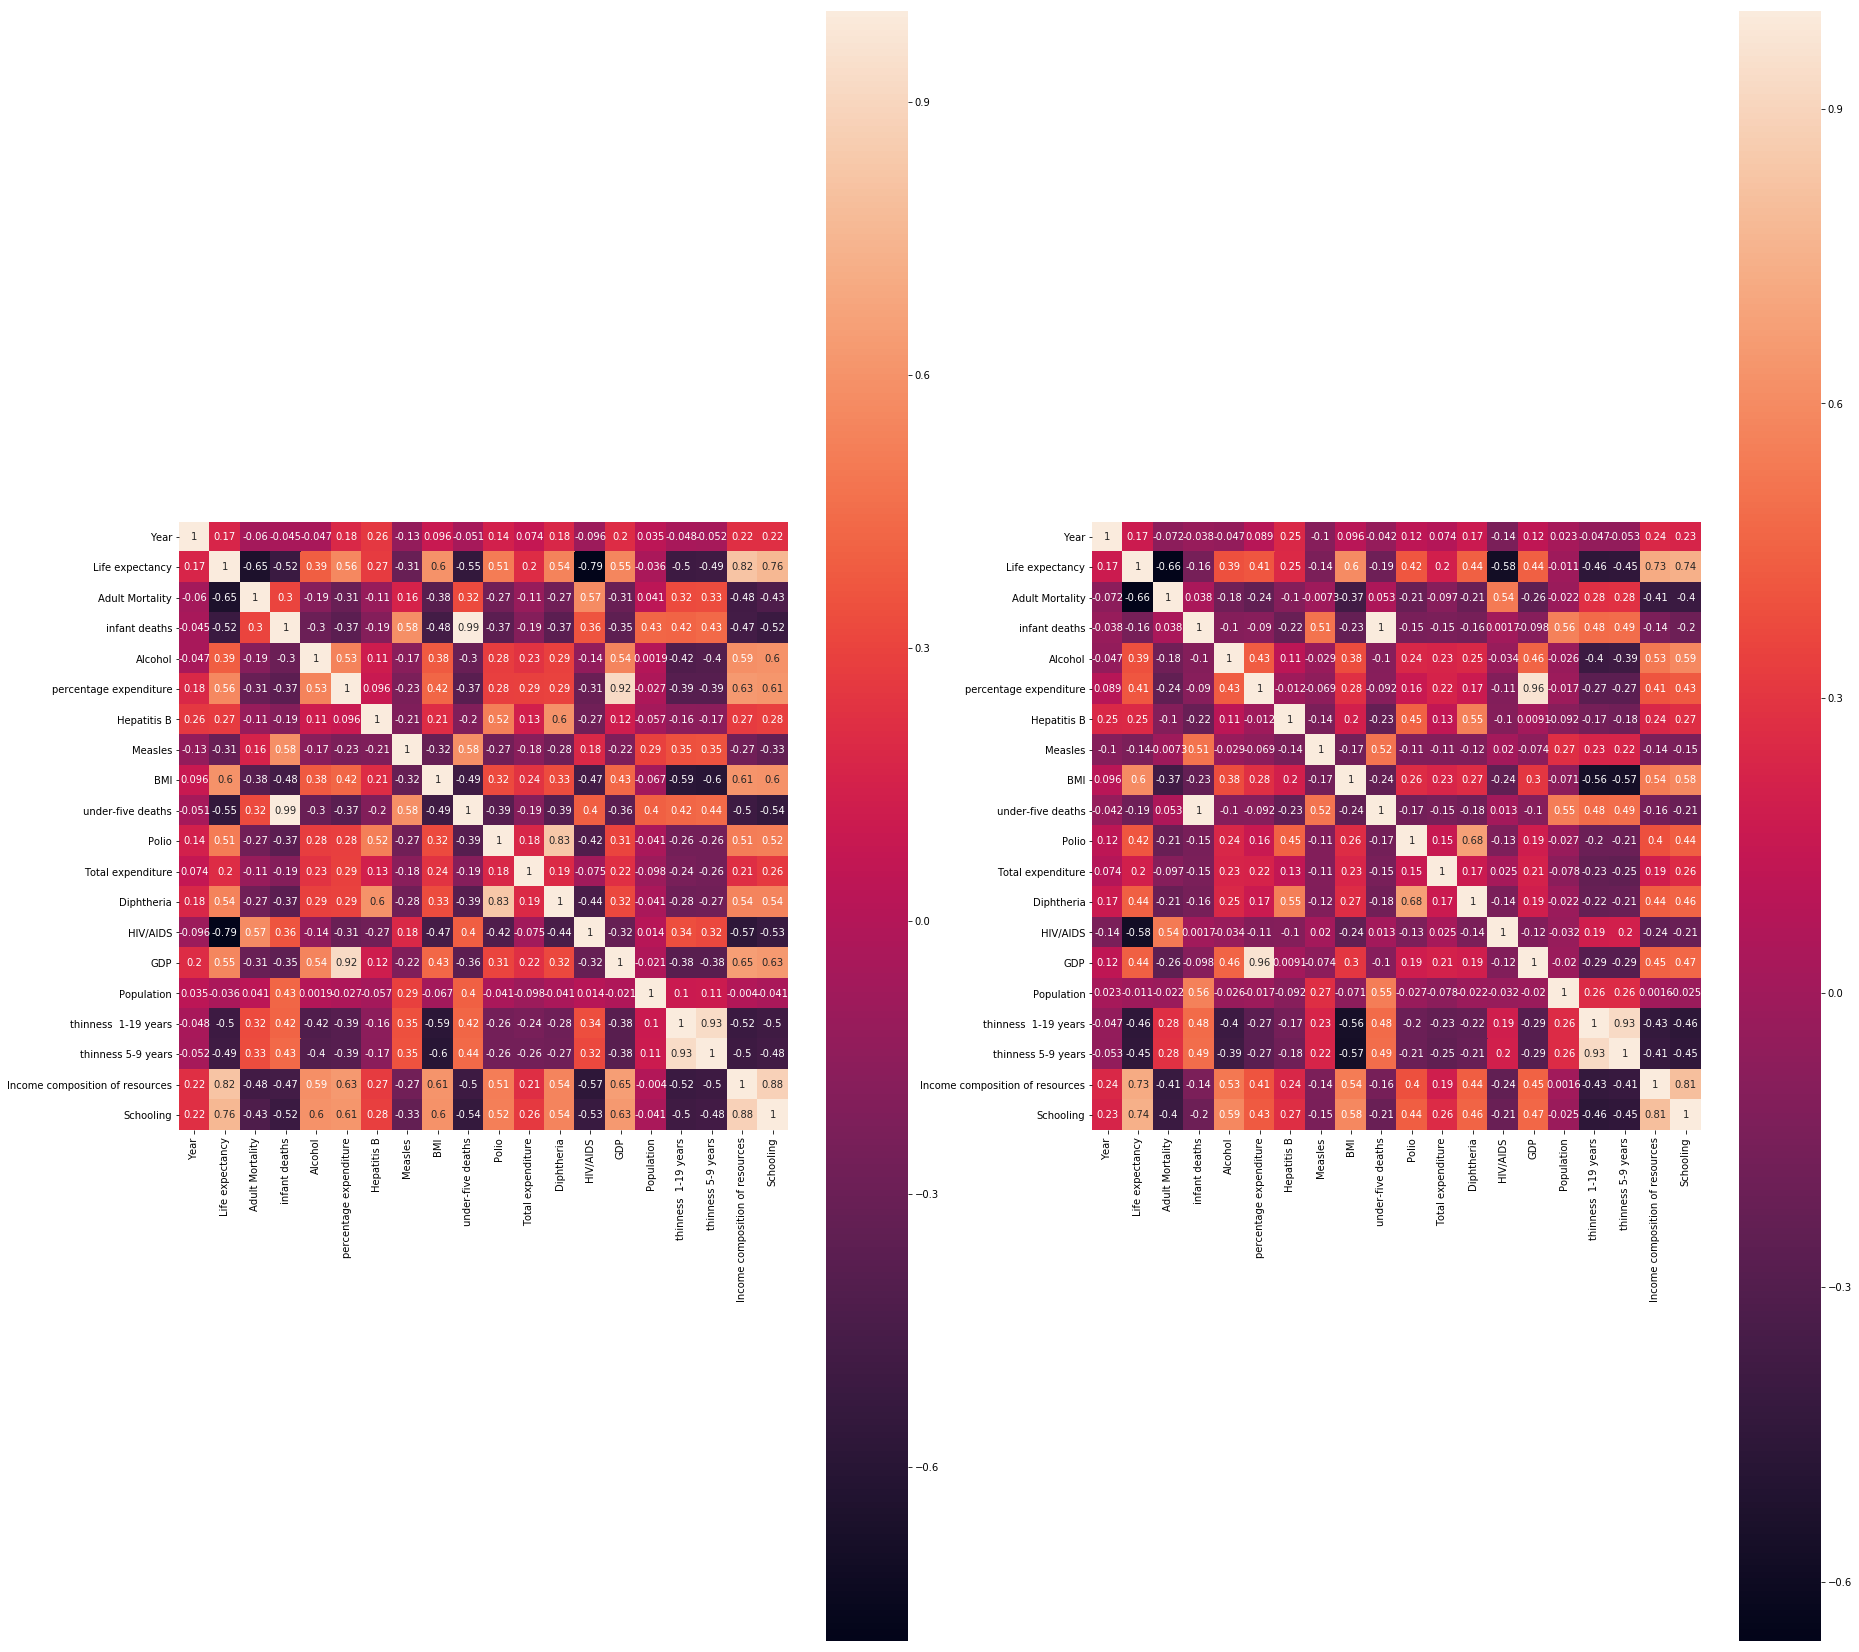

In [21]:
plt.figure(figsize =(30,30))
plt.subplot(1,2,1)
sns.heatmap(new_data.corr(),square = True,annot = True)
plt.subplot(1,2,2)
sns.heatmap(data[new_data.columns].corr(),square = True, annot = True)
plt.show()

In [48]:
new_data.describe(include = 'O')

,Country,Status
count,1987,1987
unique,133,2
top,Afghanistan,Developing
freq,16,1702


<BarContainer object of 16 artists>

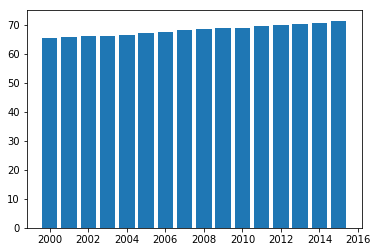

In [49]:
mean_Year = pd.DataFrame(data.groupby('Year')['Life expectancy'].mean().sort_values())
plt.bar(mean_Year.index,mean_Year['Life expectancy'])

<BarContainer object of 2 artists>

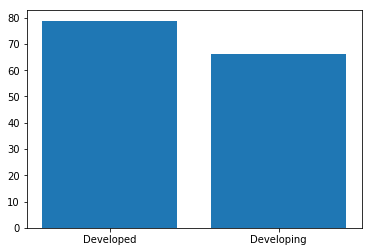

In [50]:
mean_Status = pd.DataFrame(data.groupby('Status')['Life expectancy'].mean())
plt.bar(mean_Status.index,mean_Status['Life expectancy'])

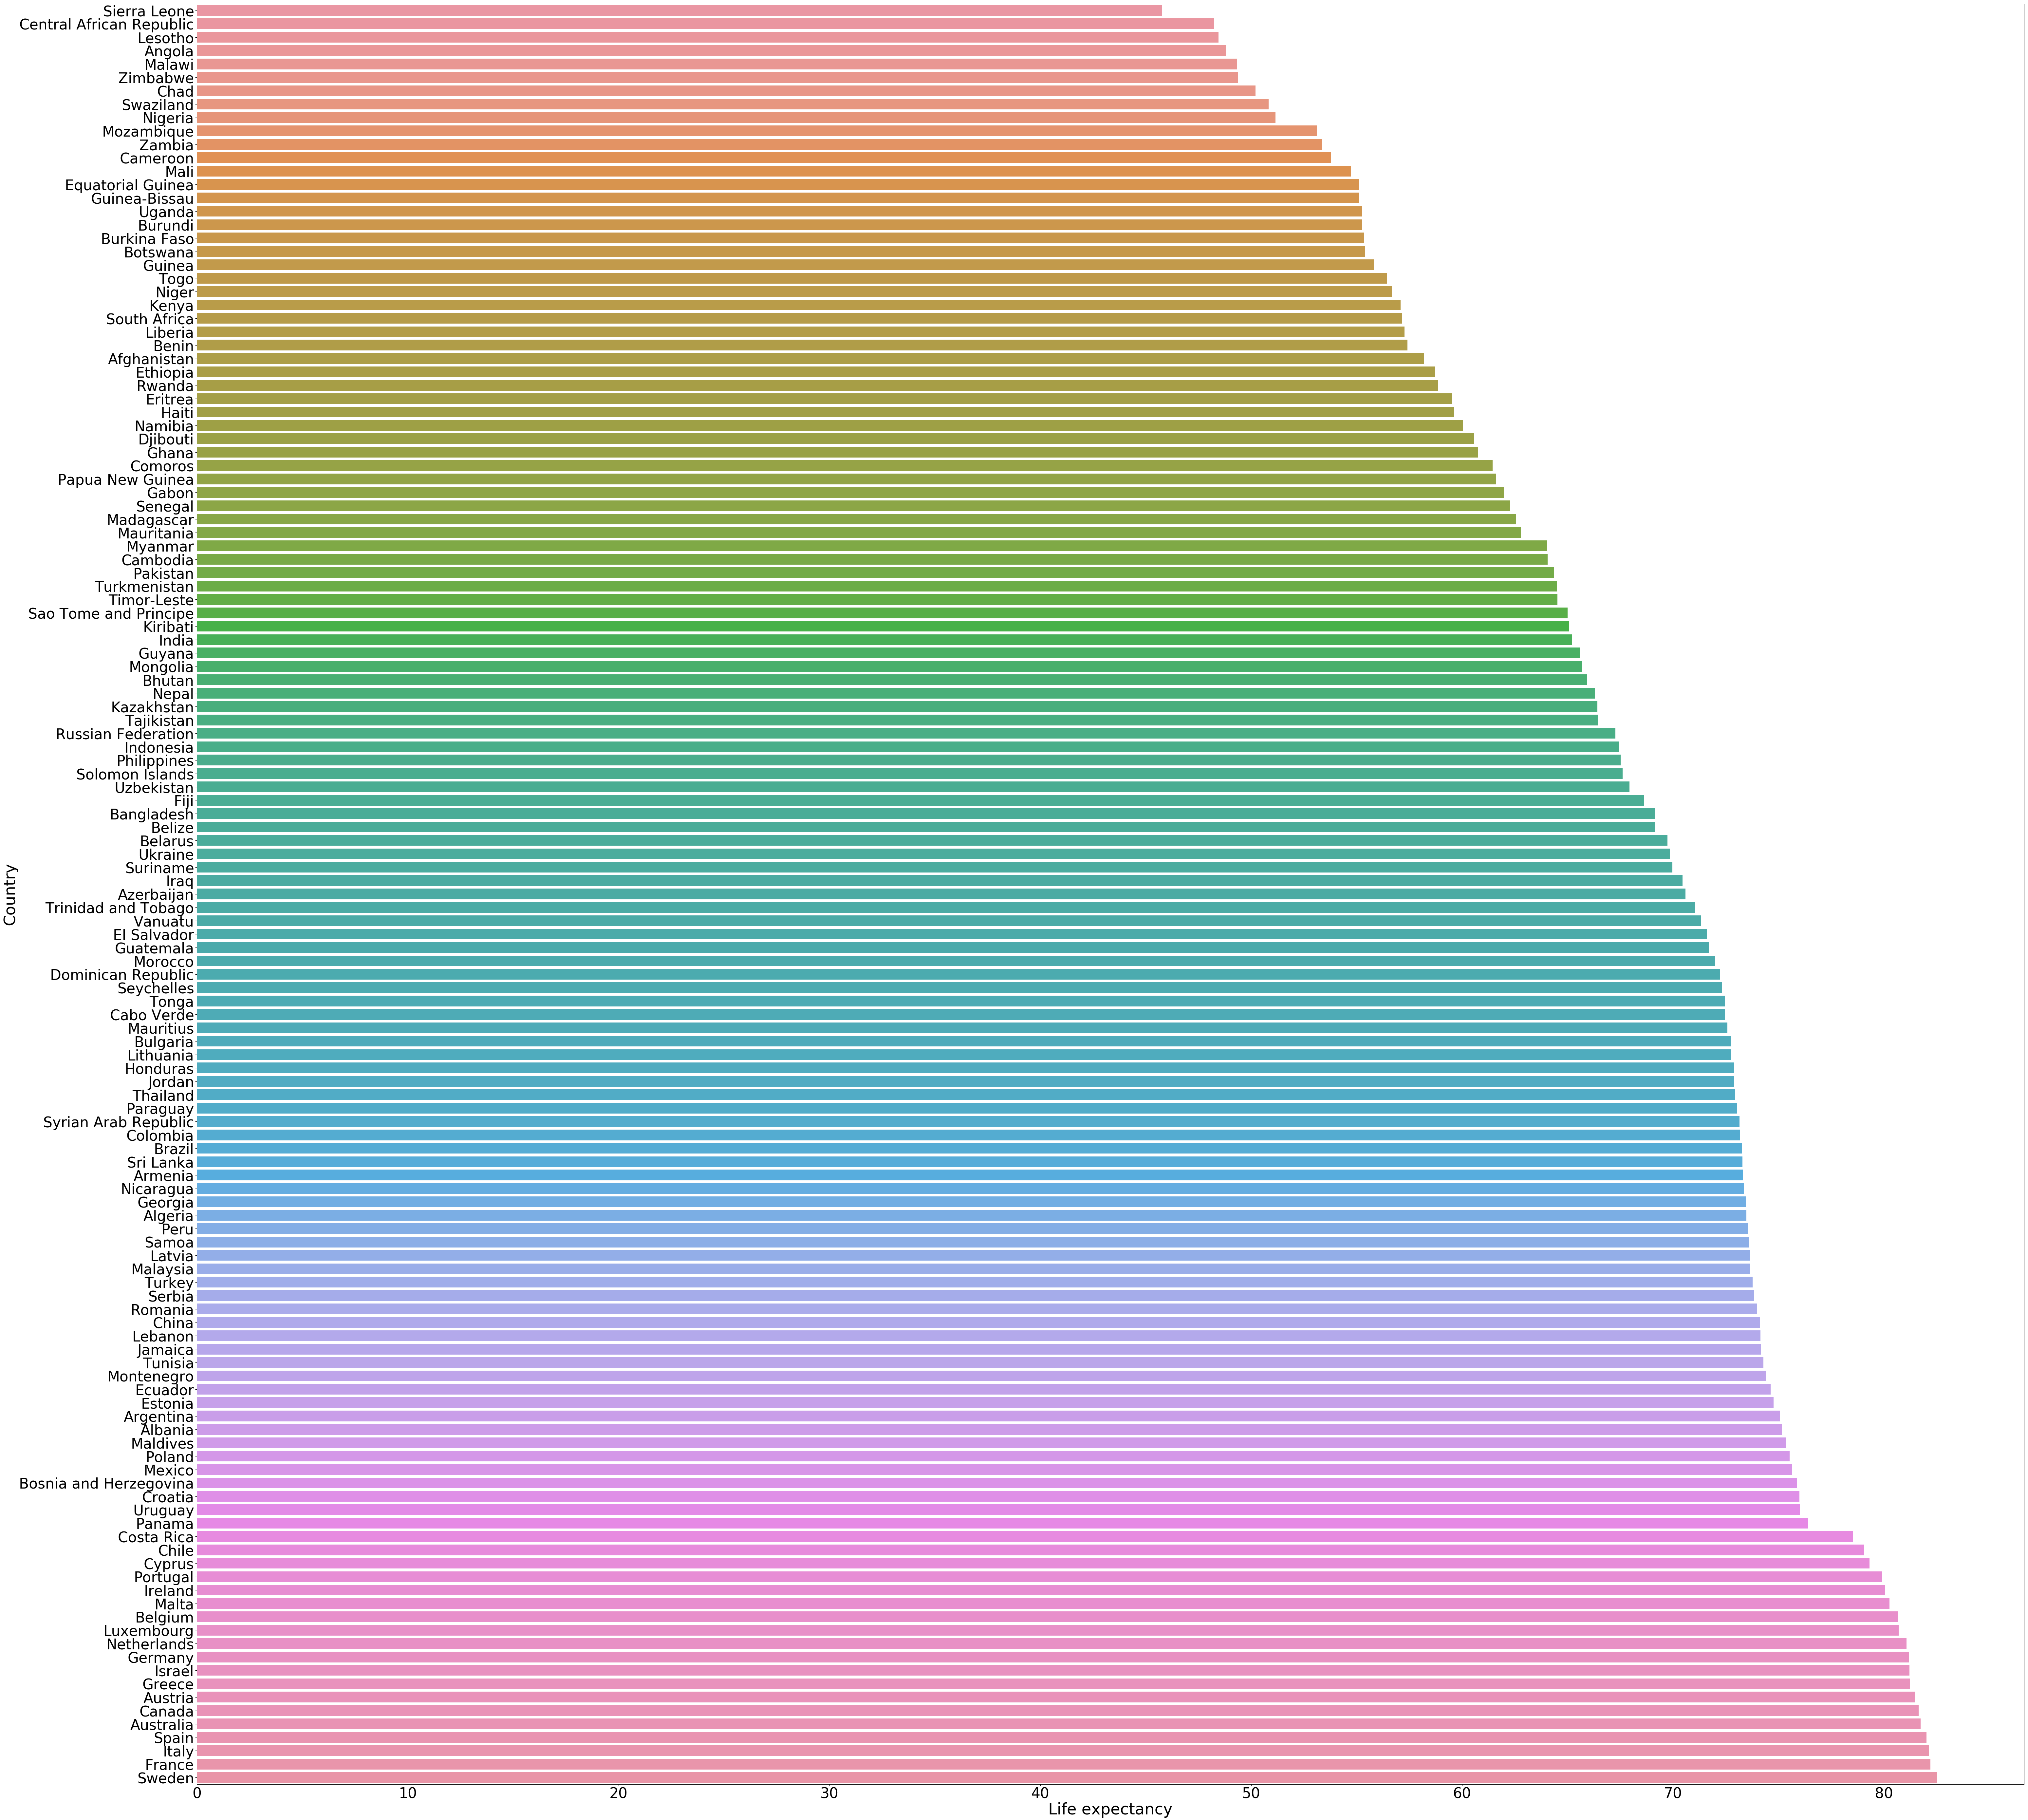

In [51]:
mean_Country = pd.DataFrame(data.groupby('Country')['Life expectancy'].mean().sort_values())
mean_Country['Country']= mean_Country.index
plt.figure(figsize = (100,100))
sns.set_context("paper", font_scale=5)
sns.barplot(y='Country',x='Life expectancy',data = mean_Country)
sns.set_context("paper", font_scale=1)

In [22]:
x = new_data.drop(['Life expectancy'],axis = 1)
y = new_data['Life expectancy']

In [23]:
x.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,263.0,61,0.01,71.279624,65.0,1154,19.1,...,41.0,8.16,65.0,0.1,584.259210,18588758.0,16.6,16.7,0.479,10.1
1,Afghanistan,2014,Developing,271.0,61,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,16.6,16.7,0.476,10.0
2,Afghanistan,2013,Developing,268.0,61,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,18588758.0,16.6,16.7,0.470,9.9
3,Afghanistan,2012,Developing,272.0,61,0.01,78.184215,67.0,1238,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,16.6,16.7,0.463,9.8
4,Afghanistan,2011,Developing,275.0,61,0.01,7.097109,68.0,1238,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,16.6,16.7,0.454,9.5


In [24]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

In [26]:
x_train.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1479,Lesotho,2010,Developing,495.0,4,2.71,154.870600,93.0,1238,29.7,...,92.0,1.87,93.0,3.3,1173.262120,24551.0,7.2,7.0,0.464,10.9
2631,Togo,2001,Developing,345.0,14,0.95,2.048575,24.0,1238,17.1,...,51.0,4.29,45.0,3.3,26.639465,511177.0,9.2,9.1,0.426,9.4
1030,Greece,2011,Developing,76.0,0,8.02,1132.432517,95.0,40,64.3,...,99.0,9.77,99.0,0.1,9985.369590,1114899.0,0.8,0.7,0.860,16.7
1311,Jamaica,2002,Developing,167.0,1,3.76,211.114332,36.0,0,43.5,...,99.0,4.86,99.0,2.3,3596.496282,2695446.0,2.0,1.8,0.690,11.7
826,El Salvador,2007,Developing,23.0,2,2.83,52.301722,99.0,0,5.8,...,99.0,6.32,99.0,0.3,334.838170,683475.0,1.8,1.7,0.657,12.9


In [27]:
c_tranform = Pipeline(steps = [('onehot',OneHotEncoder(handle_unknown = 'ignore')),])

In [28]:
n_tranform = Pipeline(steps=[('imputer',SimpleImputer(strategy = 'median')),])

In [29]:
pre_process = ColumnTransformer(transformers=[
    ('cat',c_tranform,new_data.columns[:3]),
    ('num',n_tranform,new_data.columns[4:])
])

In [31]:
lm = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [32]:
pip_lm = Pipeline([('preprocessor',pre_process),('RFRegressor',lm)])

In [33]:
pip_lm.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>...gressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [34]:
r2_score(pip_lm.predict(x_test),y_test)

0.8223938658115282

In [35]:
pip_dt = Pipeline([('preprocessor',pre_process),('RFRegressor',dt)])
pip_dt.fit(x_train,y_train)
r2_score(pip_dt.predict(x_test),y_test)

0.9173474324634683

In [36]:
pip_rf = Pipeline([('preprocessor',pre_process),('RFRegressor',rf)])
pip_rf.fit(x_train,y_train)
r2_score(pip_rf.predict(x_test),y_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9536856749389229

In [37]:
credentials={
  "apikey": "toHOcrNOAhqk41IvNAU0DQBcmGNaKQOmm3U2gHARbTYI",
  "instance_id": "14ccaec3-a3c6-465d-b1db-bbaf8a6fe58f",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [38]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-12 08:01:04,966 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [39]:
client = WatsonMachineLearningAPIClient(credentials)

In [40]:
model_props = { client.repository.ModelMetaNames.AUTHOR_NAME: "RAKESH KANTA KANDIPATI",
                   client.repository.ModelMetaNames.AUTHOR_EMAIL: "kandipatirakeshkanta@gmail.com",
                   client.repository.ModelMetaNames.NAME:"LifeExpectancy"
}

In [41]:
model_artifact = client.repository.store_model(pip_rf,meta_props=model_props)

In [42]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [43]:
published_model_uid

'dc985543-f4c5-4a60-a2df-89fd26a871c9'

In [44]:
client.deployments.list()

------------------------------------  ------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
02e5b7b5-2167-4148-a32f-705f4c34c3da  Life Expectancy rf  online  DEPLOY_SUCCESS  2020-06-12T04:05:55.593Z  scikit-learn-0.20  model
------------------------------------  ------------------  ------  --------------  ------------------------  -----------------  -------------


In [45]:
deployment = client.deployments.create(published_model_uid,name='Life Expectancy rf')



#######################################################################################

Synchronous deployment creation for uid: 'dc985543-f4c5-4a60-a2df-89fd26a871c9' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4500622b-2df3-40f2-abd5-b0d0000b59b1'
------------------------------------------------------------------------------------------------




In [46]:
scoring_endpoing = client.deployments.get_scoring_url(deployment)

In [47]:
scoring_endpoing

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/14ccaec3-a3c6-465d-b1db-bbaf8a6fe58f/deployments/4500622b-2df3-40f2-abd5-b0d0000b59b1/online'